# Lab 4 - Neural Networks

### Name: Yadu Krishnan Madhu
### Section: 10
### Student Number: 500975010


In [1]:
#Importing libraries


import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler


import matplotlib.pyplot as plt

## Q1, Q2

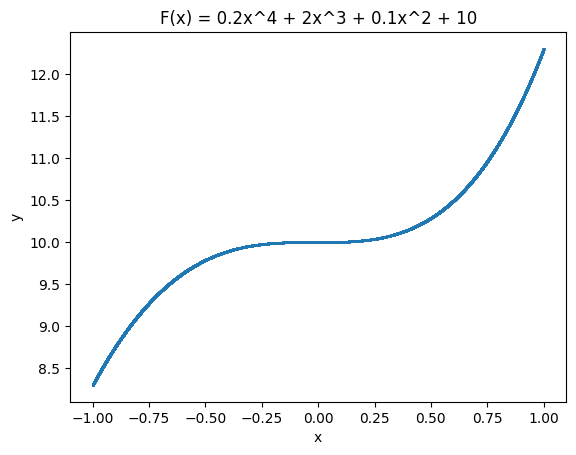

In [2]:
def generate_samples():
    np.random.seed(42)  # Hard setting seed for repeatability
    
    # Generate 30,000 random samples for x between -1 and 1
    x = np.random.uniform(low=-1, high=1, size=(30000))

    # Calculate the corresponding y values using the given function
    y = 0.2 * x**4 + 2 * x**3 + 0.1 * x**2 + 10

    return x, y


def get_dataset(shuffle_data=True):
    x, y = generate_samples() # Generates Data for x and y

    if shuffle_data:
        # Shuffle the data
        indices = np.arange(len(x))
        np.random.shuffle(indices)
        x = x[indices]
        y = y[indices]
    return x, y

def shuffle_data(x, y):
    indices = np.arange(len(x))
    np.random.shuffle(indices)
    return x[indices], y[indices]

x, y = get_dataset(shuffle_data=False)  # Data without shuffling

# Plot the function
plt.scatter(x, y, s=1, alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('F(x) = 0.2x^4 + 2x^3 + 0.1x^2 + 10')
plt.show()

## Q3

In [3]:
def split_data(x, y, train_ratio=0.3, value_ratio=0.2, testing_ratio=0.5):
    #  Assert True, False
    assert train_ratio + value_ratio + testing_ratio == 1.0, "Ratios should sum up to 1.0"
    assert len(x) == len(y), "Data arrays should have the same length"

    # Train, validation, and test sets
    data_length = len(x)
    train_size = int(train_ratio * data_length)
    value_size = int(value_ratio * data_length)

    train_x = x[:train_size]
    train_y = y[:train_size]

    val_x = x[train_size:train_size + value_size]
    val_y = y[train_size:train_size + value_size]

    test_x = x[train_size + value_size:]
    test_y = y[train_size + value_size:]

    return train_x, train_y, val_x, val_y, test_x, test_y


x, y = get_dataset(shuffle_data=True)
train_x, train_y, val_x, val_y, test_x, test_y = split_data(x, y, train_ratio=0.3, value_ratio=0.2, testing_ratio=0.5)

# Print the sizes of the split datasets
print("Train set size:", len(train_x))
print("Validation set size:", len(val_x))
print("Test set size:", len(test_x))

Train set size: 9000
Validation set size: 6000
Test set size: 15000


## Q4

In [4]:
# Using sklearn.metrics library
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    return mae, mse, rmse, r2

# Actual target values
y_true = [1.2, 2.4, 3.6, 4.8, 6.0]

# Predicted values
y_pred = [1.0, 2.2, 3.8, 4.6, 5.8]

# Calculate metrics
mae, mse, rmse, r2 = calculate_metrics(y_true, y_pred)

# Print the calculated metrics
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R2 Score: {:.3f}".format(r2))

Mean Absolute Error (MAE): 0.200
Mean Squared Error (MSE): 0.040
Root Mean Squared Error (RMSE): 0.200
R2 Score: 0.986


## Keras Library for shuffled data

### Activation Function RELU (Case 1)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 43.6753 - val_loss: 0.0945
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 927us/step - loss: 0.0686 - val_loss: 0.0294
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 913us/step - loss: 0.0256 - val_loss: 0.0134
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 911us/step - loss: 0.0114 - val_loss: 0.0056
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 921us/step - loss: 0.0048 - val_loss: 0.0036
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 909us/step - loss: 0.0032 - val_loss: 0.0026
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 895us/step - loss: 0.0024 - val_loss: 0.0022
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 951us/step - loss: 0.0021 - val_loss: 0.0017
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 945us/step - loss: 0.0019 - val_loss: 0.0015
Epoch 10/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 917us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 11/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 932us/step - loss: 0.0015 - val_loss: 0.0013
Epoch 12/20
750/750 ━━━━━━━━━━━

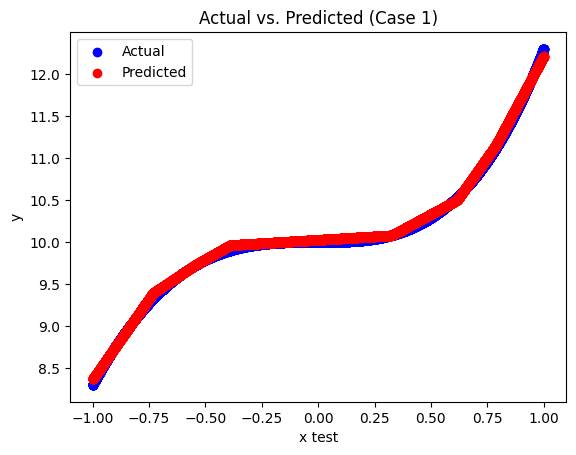

In [5]:
# Generate the shuffled and unscaled dataset
x, y = get_dataset(shuffle_data=True)

# Split the data into train, validation, and test sets
train_x, train_y, val_x, val_y, test_x, test_y = split_data(x, y, train_ratio=0.3, value_ratio=0.2, testing_ratio=0.5)

# Define the structure of the neural network
model = keras.Sequential([
    keras.layers.Input(shape=(1,)),
    keras.layers.Dense(12, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(train_x, train_y, epochs=20, batch_size=12, validation_data=(val_x, val_y))

# Evaluate the model on test data
loss = model.evaluate(test_x, test_y)

# Make predictions
y_pred = model.predict(test_x)

# Calculate metrics
mae, mse, rmse, r2 = calculate_metrics(test_y, y_pred)

# Print the calculated metrics
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R2 Score: {:.3f}".format(r2))

# Plot the actual test data vs. predicted data
plt.scatter(test_x, test_y, color='b', label='Actual')
plt.scatter(test_x, y_pred, color='r', label='Predicted')
plt.xlabel('x test')
plt.ylabel('y')
plt.title('Actual vs. Predicted (Case 1)')
plt.legend()
plt.show()

### Activation Function: Relu (Case 2)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 949us/step - loss: 70.4687 - val_loss: 0.3715
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 851us/step - loss: 0.1898 - val_loss: 0.1040
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 826us/step - loss: 0.0986 - val_loss: 0.0671
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 875us/step - loss: 0.0630 - val_loss: 0.0468
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 839us/step - loss: 0.0450 - val_loss: 0.0384
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 865us/step - loss: 0.0373 - val_loss: 0.0308
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 844us/step - loss: 0.0283 - val_loss: 0.0211
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 829us/step - loss: 0.0202 - val_loss: 0.0137
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 836us/step - loss: 0.0128 - val_loss: 0.0093
Epoch 10/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 873us/step - loss: 0.0083 - val_loss: 0.0074
Epoch 11/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 825us/step - loss: 0.0069 - val_loss: 0.0058
Epoch 12/20
750/750 ━━━━━━━━━

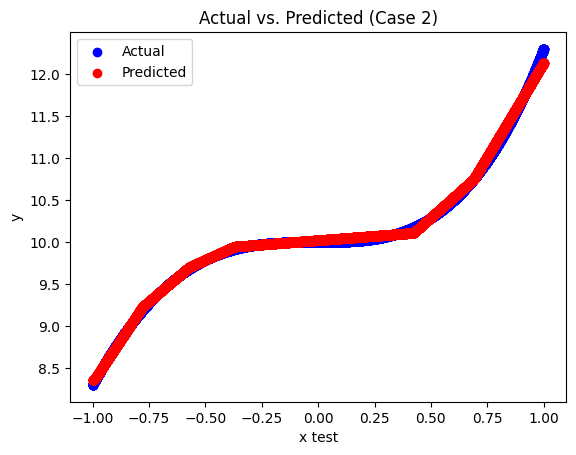

In [6]:
# Generate the shuffled and unscaled dataset
x, y = get_dataset(shuffle_data=True)

# Split the data into train, validation, and test sets
train_x, train_y, val_x, val_y, test_x, test_y = split_data(x, y, train_ratio=0.3, value_ratio=0.2, testing_ratio=0.5)

# Define the structure of the neural network
model = keras.Sequential([
    keras.layers.Input(shape=(1,)),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(train_x, train_y, epochs=20, batch_size=12, validation_data=(val_x, val_y))

# Evaluate the model on test data
loss = model.evaluate(test_x, test_y)

# Make predictions
y_pred = model.predict(test_x)

# Calculate metrics
mae, mse, rmse, r2 = calculate_metrics(test_y, y_pred)

# Print the calculated metrics
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R2 Score: {:.3f}".format(r2))

# Plot the actual test data vs. predicted data
plt.scatter(test_x, test_y, color='b', label='Actual')
plt.scatter(test_x, y_pred, color='r', label='Predicted')
plt.xlabel('x test')
plt.ylabel('y')
plt.title('Actual vs. Predicted (Case 2)')
plt.legend()
plt.show()

### Activation Function: Tanh (Case 3)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 49.5444 - val_loss: 8.9226
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 900us/step - loss: 6.1057 - val_loss: 1.4529
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 928us/step - loss: 1.0679 - val_loss: 0.5905
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 912us/step - loss: 0.5556 - val_loss: 0.2964
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 933us/step - loss: 0.2686 - val_loss: 0.2234
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 993us/step - loss: 0.2076 - val_loss: 0.1645
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 920us/step - loss: 0.1505 - val_loss: 0.0918
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 899us/step - loss: 0.0683 - val_loss: 0.0324
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 923us/step - loss: 0.0260 - val_loss: 0.0136
Epoch 10/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 935us/step - loss: 0.0123 - val_loss: 0.0062
Epoch 11/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 920us/step - loss: 0.0050 - val_loss: 0.0030
Epoch 12/20
750/750 ━━━━━━━━━━━

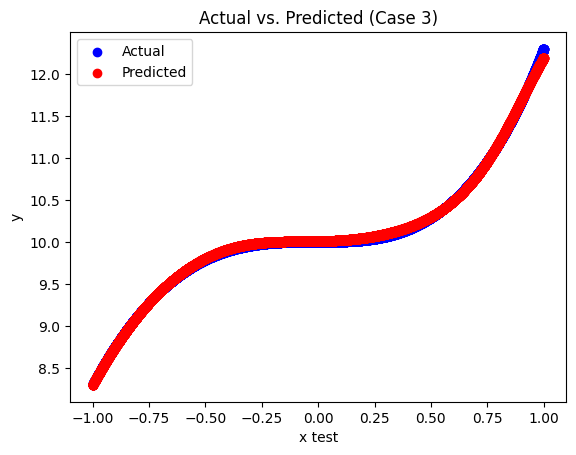

In [7]:
# Generate the shuffled and unscaled dataset
x, y = get_dataset(shuffle_data=True)

# Split the data into train, validation, and test sets
train_x, train_y, val_x, val_y, test_x, test_y = split_data(x, y, train_ratio=0.3, value_ratio=0.2, testing_ratio=0.5)

# Define the structure of the neural network
model = keras.Sequential([
    keras.layers.Input(shape=(1,)),
    keras.layers.Dense(12, activation='tanh'),
    keras.layers.Dense(8, activation='tanh'),
    keras.layers.Dense(4, activation='tanh'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(train_x, train_y, epochs=20, batch_size=12, validation_data=(val_x, val_y))

# Evaluate the model on test data
loss = model.evaluate(test_x, test_y)

# Make predictions
y_pred = model.predict(test_x)

# Calculate metrics
mae, mse, rmse, r2 = calculate_metrics(test_y, y_pred)

# Print the calculated metrics
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R2 Score: {:.3f}".format(r2))

# Plot the actual test data vs. predicted data
plt.scatter(test_x, test_y, color='b', label='Actual')
plt.scatter(test_x, y_pred, color='r', label='Predicted')
plt.xlabel('x test')
plt.ylabel('y')
plt.title('Actual vs. Predicted (Case 3)')
plt.legend()
plt.show()

### Activation Function: Relu (Case 4)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0071 - val_loss: 0.0054
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 921us/step - loss: 0.0057 - val_loss: 0.0055
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 939us/step - loss: 0.0055 - val_loss: 0.0055
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 917us/step - loss: 0.0056 - val_loss: 0.0054
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 996us/step - loss: 0.0054 - val_loss: 0.0057
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 923us/step - loss: 0.0055 - val_loss: 0.0055
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 938us/step - loss: 0.0056 - val_loss: 0.0054
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 907us/step - loss: 0.0055 - val_loss: 0.0058
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 960us/step - loss: 0.0056 - val_loss: 0.0054
Epoch 10/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 902us/step - loss: 0.0055 - val_loss: 0.0055
Epoch 11/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 912us/step - loss: 0.0052 - val_loss: 0.0039
Epoch 12/20
750/750 ━━━━━━━━━━━━

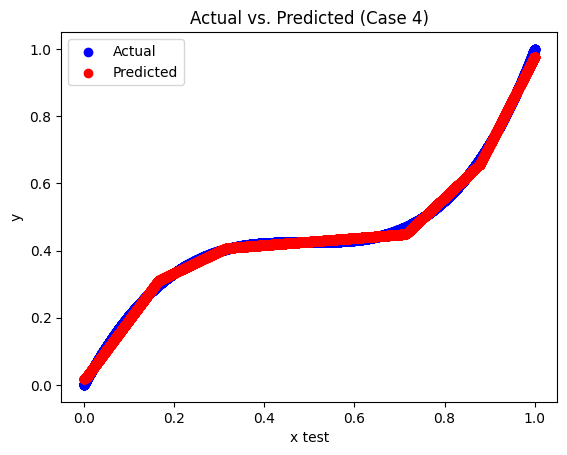

In [8]:
# Generate the shuffled and unscaled dataset
x, y = get_dataset(shuffle_data=True)

# Shuffle data
x, y = shuffle_data(x, y)

# Split the data into train, validation, and test sets
train_x, train_y, val_x, val_y, test_x, test_y = split_data(x, y, train_ratio=0.3, value_ratio=0.2, testing_ratio=0.5)

# Scale the data
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x.reshape(-1, 1)).flatten()
val_x = scaler.transform(val_x.reshape(-1, 1)).flatten()
test_x = scaler.transform(test_x.reshape(-1, 1)).flatten()
train_y = scaler.fit_transform(train_y.reshape(-1, 1)).flatten()
val_y = scaler.transform(val_y.reshape(-1, 1)).flatten()
test_y = scaler.transform(test_y.reshape(-1, 1)).flatten()

# Define the structure of the neural network
model = keras.Sequential([
    keras.layers.Input(shape=(1,)),
    keras.layers.Dense(12, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1)
])
# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(train_x, train_y, epochs=20, batch_size=12, validation_data=(val_x, val_y))

# Evaluate the model on test data
loss = model.evaluate(test_x, test_y)

# Make predictions
y_pred = model.predict(test_x)

# Calculate metrics
mae, mse, rmse, r2 = calculate_metrics(test_y, y_pred)

# Print the calculated metrics
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R2 Score: {:.3f}".format(r2))

# Plot the actual test data vs. predicted data
plt.scatter(test_x, test_y, color='b', label='Actual')
plt.scatter(test_x, y_pred, color='r', label='Predicted')
plt.xlabel('x test')
plt.ylabel('y')
plt.title('Actual vs. Predicted (Case 4)')
plt.legend()
plt.show()

### Activation Function: Tanh (Case 5)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0227 - val_loss: 0.0069
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 900us/step - loss: 0.0071 - val_loss: 0.0073
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 921us/step - loss: 0.0066 - val_loss: 0.0071
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 951us/step - loss: 0.0064 - val_loss: 0.0051
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 955us/step - loss: 0.0046 - val_loss: 8.5668e-04
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 901us/step - loss: 6.8338e-04 - val_loss: 5.3655e-04
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 949us/step - loss: 4.5426e-04 - val_loss: 3.9659e-04
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 904us/step - loss: 3.7008e-04 - val_loss: 2.7360e-04
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.3644e-04 - val_loss: 2.5037e-04
Epoch 10/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 912us/step - loss: 2.9385e-04 - val_loss: 2.6106e-04
Epoch 11/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 921us/step - loss: 2.4203e-04 - val

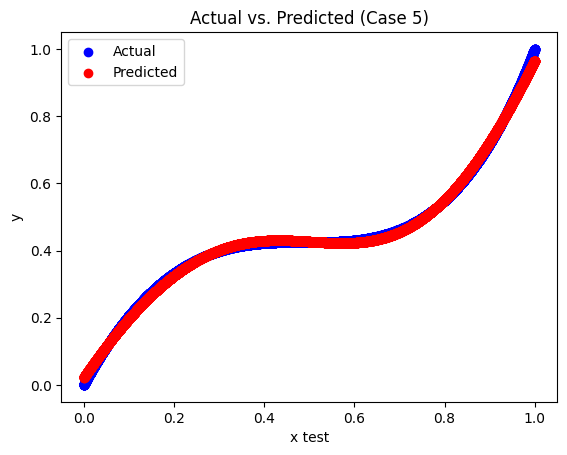

In [9]:
# Generate the shuffled and unscaled dataset
x, y = get_dataset(shuffle_data=True)

# Shuffle the data
x, y = shuffle_data(x, y)

# Split the data into train, validation, and test sets
train_x, train_y, val_x, val_y, test_x, test_y = split_data(x, y, train_ratio=0.3, value_ratio=0.2, testing_ratio=0.5)

# Scale the data
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x.reshape(-1, 1)).flatten()
val_x = scaler.transform(val_x.reshape(-1, 1)).flatten()
test_x = scaler.transform(test_x.reshape(-1, 1)).flatten()
train_y = scaler.fit_transform(train_y.reshape(-1, 1)).flatten()
val_y = scaler.transform(val_y.reshape(-1, 1)).flatten()
test_y = scaler.transform(test_y.reshape(-1, 1)).flatten()

# Define the structure of the neural network
model = keras.Sequential([
    keras.layers.Input(shape=(1,)),
    keras.layers.Dense(12, activation='tanh'),
    keras.layers.Dense(8, activation='tanh'),
    keras.layers.Dense(4, activation='tanh'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(train_x, train_y, epochs=20, batch_size=12, validation_data=(val_x, val_y))

# Evaluate the model on test data
loss = model.evaluate(test_x, test_y)

# Make predictions
y_pred = model.predict(test_x)

# Calculate metrics
mae, mse, rmse, r2 = calculate_metrics(test_y, y_pred)

# Print the calculated metrics
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R2 Score: {:.3f}".format(r2))

# Plot the actual test data vs. predicted data
plt.scatter(test_x, test_y, color='b', label='Actual')
plt.scatter(test_x, y_pred, color='r', label='Predicted')
plt.xlabel('x test')
plt.ylabel('y')
plt.title('Actual vs. Predicted (Case 5)')
plt.legend()
plt.show()

### Activation Function RELU (Case 1)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 98.1458 - val_loss: 87.8659
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 927us/step - loss: 83.9661 - val_loss: 75.0148
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 71.6775 - val_loss: 63.4766
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 904us/step - loss: 60.3765 - val_loss: 53.1205
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 921us/step - loss: 50.4682 - val_loss: 43.8627
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 905us/step - loss: 41.5714 - val_loss: 35.6393
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 958us/step - loss: 33.3667 - val_loss: 28.4018
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step - loss: 26.7093 - val_loss: 22.1177
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 949us/step - loss: 20.4123 - val_loss: 16.7473
Epoch 10/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 999us/step - loss: 15.3620 - val_loss: 12.2599
Epoch 11/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 915us/step - loss: 11.2268 - val_loss: 8.6188
Epoch 12/20
7

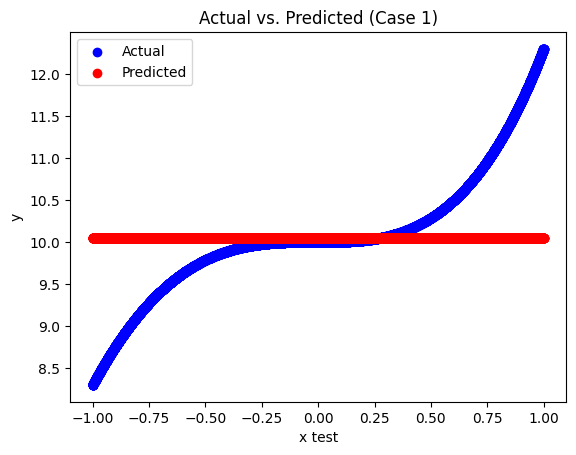

In [10]:
# Generate the shuffled and unscaled dataset
x, y = get_dataset(shuffle_data=False)

# Split the data into train, validation, and test sets
train_x, train_y, val_x, val_y, test_x, test_y = split_data(x, y, train_ratio=0.3, value_ratio=0.2, testing_ratio=0.5)

# Define the structure of the neural network
model = keras.Sequential([
    keras.layers.Input(shape=(1,)),
    keras.layers.Dense(12, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(train_x, train_y, epochs=20, batch_size=12, validation_data=(val_x, val_y))

# Evaluate the model on test data
loss = model.evaluate(test_x, test_y)

# Make predictions
y_pred = model.predict(test_x)

# Calculate metrics
mae, mse, rmse, r2 = calculate_metrics(test_y, y_pred)

# Print the calculated metrics
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R2 Score: {:.3f}".format(r2))

# Plot the actual test data vs. predicted data
plt.scatter(test_x, test_y, color='b', label='Actual')
plt.scatter(test_x, y_pred, color='r', label='Predicted')
plt.xlabel('x test')
plt.ylabel('y')
plt.title('Actual vs. Predicted (Case 1)')
plt.legend()
plt.show()

### Activation Function: Relu (Case 2)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 912us/step - loss: 66.3071 - val_loss: 0.1186
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 821us/step - loss: 0.0971 - val_loss: 0.0776
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 813us/step - loss: 0.0730 - val_loss: 0.0599
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 814us/step - loss: 0.0574 - val_loss: 0.0512
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 794us/step - loss: 0.0486 - val_loss: 0.0460
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 797us/step - loss: 0.0450 - val_loss: 0.0392
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 870us/step - loss: 0.0365 - val_loss: 0.0299
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 800us/step - loss: 0.0259 - val_loss: 0.0190
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 818us/step - loss: 0.0163 - val_loss: 0.0112
Epoch 10/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 822us/step - loss: 0.0096 - val_loss: 0.0071
Epoch 11/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 826us/step - loss: 0.0062 - val_loss: 0.0047
Epoch 12/20
750/750 ━━━━━━━━━

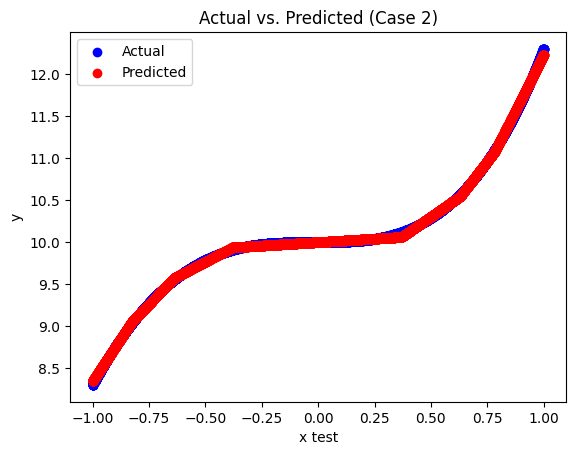

In [11]:
# Generate the shuffled and unscaled dataset
x, y = get_dataset(shuffle_data=False)

# Split the data into train, validation, and test sets
train_x, train_y, val_x, val_y, test_x, test_y = split_data(x, y, train_ratio=0.3, value_ratio=0.2, testing_ratio=0.5)

# Define the structure of the neural network
model = keras.Sequential([
    keras.layers.Input(shape=(1,)),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(train_x, train_y, epochs=20, batch_size=12, validation_data=(val_x, val_y))

# Evaluate the model on test data
loss = model.evaluate(test_x, test_y)

# Make predictions
y_pred = model.predict(test_x)

# Calculate metrics
mae, mse, rmse, r2 = calculate_metrics(test_y, y_pred)

# Print the calculated metrics
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R2 Score: {:.3f}".format(r2))

# Plot the actual test data vs. predicted data
plt.scatter(test_x, test_y, color='b', label='Actual')
plt.scatter(test_x, y_pred, color='r', label='Predicted')
plt.xlabel('x test')
plt.ylabel('y')
plt.title('Actual vs. Predicted (Case 2)')
plt.legend()
plt.show()

### Activation Function: Tanh (Case 3)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 59.7327 - val_loss: 14.7729
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 954us/step - loss: 10.4369 - val_loss: 2.8889
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 936us/step - loss: 1.9958 - val_loss: 0.7492
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 916us/step - loss: 0.6437 - val_loss: 0.5756
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 988us/step - loss: 0.4727 - val_loss: 0.2798
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 967us/step - loss: 0.2316 - val_loss: 0.1997
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 952us/step - loss: 0.1774 - val_loss: 0.1494
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 943us/step - loss: 0.1308 - val_loss: 0.0637
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 924us/step - loss: 0.0487 - val_loss: 0.0244
Epoch 10/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0185 - val_loss: 0.0097
Epoch 11/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 917us/step - loss: 0.0068 - val_loss: 0.0042
Epoch 12/20
750/750 ━━━━━━━━━━━

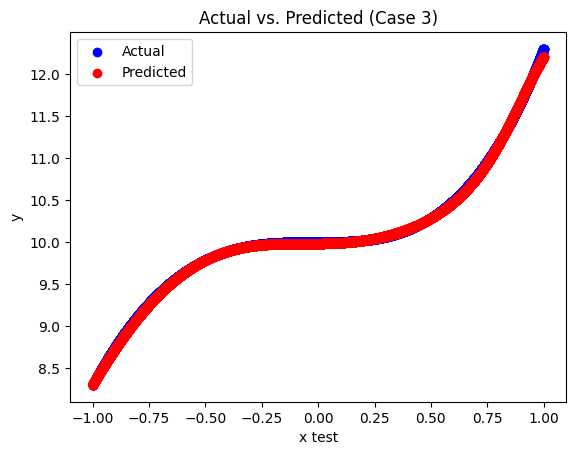

In [12]:
# Generate the shuffled and unscaled dataset
x, y = get_dataset(shuffle_data=False)

# Split the data into train, validation, and test sets
train_x, train_y, val_x, val_y, test_x, test_y = split_data(x, y, train_ratio=0.3, value_ratio=0.2, testing_ratio=0.5)

# Define the structure of the neural network
model = keras.Sequential([
    keras.layers.Input(shape=(1,)),
    keras.layers.Dense(12, activation='tanh'),
    keras.layers.Dense(8, activation='tanh'),
    keras.layers.Dense(4, activation='tanh'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(train_x, train_y, epochs=20, batch_size=12, validation_data=(val_x, val_y))

# Evaluate the model on test data
loss = model.evaluate(test_x, test_y)

# Make predictions
y_pred = model.predict(test_x)

# Calculate metrics
mae, mse, rmse, r2 = calculate_metrics(test_y, y_pred)

# Print the calculated metrics
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R2 Score: {:.3f}".format(r2))

# Plot the actual test data vs. predicted data
plt.scatter(test_x, test_y, color='b', label='Actual')
plt.scatter(test_x, y_pred, color='r', label='Predicted')
plt.xlabel('x test')
plt.ylabel('y')
plt.title('Actual vs. Predicted (Case 3)')
plt.legend()
plt.show()

### Activation Function: Relu (Case 4)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0952 - val_loss: 0.0058
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 986us/step - loss: 0.0058 - val_loss: 0.0053
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 955us/step - loss: 0.0052 - val_loss: 0.0042
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 904us/step - loss: 0.0041 - val_loss: 0.0033
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 923us/step - loss: 0.0034 - val_loss: 0.0029
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 928us/step - loss: 0.0030 - val_loss: 0.0029
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 923us/step - loss: 0.0029 - val_loss: 0.0027
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 891us/step - loss: 0.0028 - val_loss: 0.0027
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 912us/step - loss: 0.0028 - val_loss: 0.0028
Epoch 10/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 917us/step - loss: 0.0028 - val_loss: 0.0027
Epoch 11/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 12/20
750/750 ━━━━━━━━━━━━━━

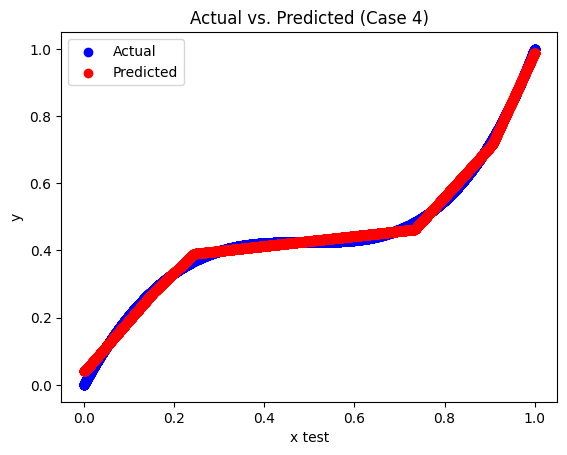

In [13]:
# Generate the shuffled and unscaled dataset
x, y = get_dataset(shuffle_data=False)

# Shuffle data
x, y = shuffle_data(x, y)

# Split the data into train, validation, and test sets
train_x, train_y, val_x, val_y, test_x, test_y = split_data(x, y, train_ratio=0.3, value_ratio=0.2, testing_ratio=0.5)

# Scale the data
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x.reshape(-1, 1)).flatten()
val_x = scaler.transform(val_x.reshape(-1, 1)).flatten()
test_x = scaler.transform(test_x.reshape(-1, 1)).flatten()
train_y = scaler.fit_transform(train_y.reshape(-1, 1)).flatten()
val_y = scaler.transform(val_y.reshape(-1, 1)).flatten()
test_y = scaler.transform(test_y.reshape(-1, 1)).flatten()

# Define the structure of the neural network
model = keras.Sequential([    
    keras.layers.Input(shape=(1,)),
    keras.layers.Dense(12, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1)
])
# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(train_x, train_y, epochs=20, batch_size=12, validation_data=(val_x, val_y))

# Evaluate the model on test data
loss = model.evaluate(test_x, test_y)

# Make predictions
y_pred = model.predict(test_x)

# Calculate metrics
mae, mse, rmse, r2 = calculate_metrics(test_y, y_pred)

# Print the calculated metrics
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R2 Score: {:.3f}".format(r2))

# Plot the actual test data vs. predicted data
plt.scatter(test_x, test_y, color='b', label='Actual')
plt.scatter(test_x, y_pred, color='r', label='Predicted')
plt.xlabel('x test')
plt.ylabel('y')
plt.title('Actual vs. Predicted (Case 4)')
plt.legend()
plt.show()

### Activation Function: Tanh (Case 5)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0440 - val_loss: 0.0069
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 914us/step - loss: 0.0072 - val_loss: 0.0070
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 916us/step - loss: 0.0071 - val_loss: 0.0066
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 919us/step - loss: 0.0069 - val_loss: 0.0065
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 969us/step - loss: 0.0065 - val_loss: 0.0063
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 917us/step - loss: 0.0063 - val_loss: 0.0060
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 949us/step - loss: 0.0063 - val_loss: 0.0059
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 925us/step - loss: 0.0061 - val_loss: 0.0057
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 902us/step - loss: 0.0058 - val_loss: 0.0054
Epoch 10/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 918us/step - loss: 0.0056 - val_loss: 0.0052
Epoch 11/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 948us/step - loss: 0.0051 - val_loss: 0.0053
Epoch 12/20
750/750 ━━━━━━━━━━━━

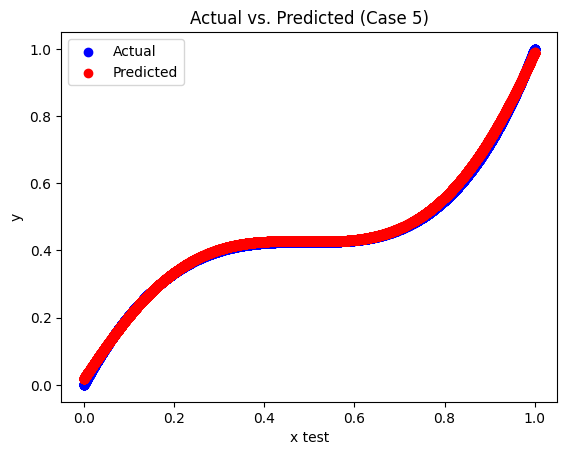

In [14]:
# Generate the shuffled and unscaled dataset
x, y = get_dataset(shuffle_data=False)

# Shuffle the data
x, y = shuffle_data(x, y)

# Split the data into train, validation, and test sets
train_x, train_y, val_x, val_y, test_x, test_y = split_data(x, y, train_ratio=0.3, value_ratio=0.2, testing_ratio=0.5)

# Scale the data
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x.reshape(-1, 1)).flatten()
val_x = scaler.transform(val_x.reshape(-1, 1)).flatten()
test_x = scaler.transform(test_x.reshape(-1, 1)).flatten()
train_y = scaler.fit_transform(train_y.reshape(-1, 1)).flatten()
val_y = scaler.transform(val_y.reshape(-1, 1)).flatten()
test_y = scaler.transform(test_y.reshape(-1, 1)).flatten()

# Define the structure of the neural network
model = keras.Sequential([
    keras.layers.Input(shape=(1,)),
    keras.layers.Dense(12, activation='tanh'),
    keras.layers.Dense(8, activation='tanh'),
    keras.layers.Dense(4, activation='tanh'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(train_x, train_y, epochs=20, batch_size=12, validation_data=(val_x, val_y))

# Evaluate the model on test data
loss = model.evaluate(test_x, test_y)

# Make predictions
y_pred = model.predict(test_x)

# Calculate metrics
mae, mse, rmse, r2 = calculate_metrics(test_y, y_pred)

# Print the calculated metrics
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R2 Score: {:.3f}".format(r2))

# Plot the actual test data vs. predicted data
plt.scatter(test_x, test_y, color='b', label='Actual')
plt.scatter(test_x, y_pred, color='r', label='Predicted')
plt.xlabel('x test')
plt.ylabel('y')
plt.title('Actual vs. Predicted (Case 5)')
plt.legend()
plt.show()

### Solve the XOR problem by using a neural network

In [15]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

# Define the XOR dataset
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

# Define the model architecture
input_dim = 2
hidden_dim = 2
output_dim = 1
model = Sequential([    
    keras.layers.Input(shape=(input_dim,)),
    Dense(hidden_dim, activation='relu'),
    Dense(output_dim, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=5000, verbose=0)

# Evaluate the model
loss, accuracy = model.evaluate(X, y, verbose=0)
print(f'Accuracy: {accuracy}')

# Predict the output for new inputs
new_X = np.array([[0,0],[0,1],[1,0],[1,1]])
predictions = model.predict(new_X)
print(predictions)


Accuracy: 0.5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[0.49998078]
 [0.4999854 ]
 [0.50001276]
 [0.5000174 ]]
